In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import precision_score,confusion_matrix,classification_report,accuracy_score
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

In [3]:
# loading the data
data = pd.read_csv('Loan Approval.csv')

In [4]:
# coping data
df=data.copy()

In [5]:
# define features and target
x=df.drop(["Loan_ID","Loan_Status"],axis=1)
y=df["Loan_Status"]

# split the data into train and test sets
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=0)

EDA

In [6]:
#check for first 5 rows of the train data
train_x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
90,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban
533,Male,No,1,Graduate,No,11250,0.0,196.0,360.0,NaN,Semiurban
452,Male,Yes,0,Graduate,No,3948,1733.0,149.0,360.0,0.0,Rural
355,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban
266,Male,Yes,2,Graduate,No,4708,1387.0,150.0,360.0,1.0,Semiurban


In [7]:
#check columns informations
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 90 to 559
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             479 non-null    object 
 1   Married            488 non-null    object 
 2   Dependents         476 non-null    object 
 3   Education          491 non-null    object 
 4   Self_Employed      463 non-null    object 
 5   ApplicantIncome    491 non-null    int64  
 6   CoapplicantIncome  491 non-null    float64
 7   LoanAmount         471 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     450 non-null    float64
 10  Property_Area      491 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 46.0+ KB


In [8]:
#check basic informations of numeric columns
train_x.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,471.000000,480.000000,450.000000
mean,5619.018330,1525.863381,147.324841,342.550000,0.837778
std,6659.021257,2787.398712,88.482349,63.953251,0.369065
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2932.000000,0.000000,100.000000,360.000000,1.000000
50%,3850.000000,997.000000,128.000000,360.000000,1.000000
75%,5763.000000,2167.500000,165.500000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


we can identify some right skewnees in the continuous  columns 

In [9]:
#check for any zero values to handle it if it's not reasonable
train_x[train_x==0].count()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome    228
LoanAmount             0
Loan_Amount_Term       0
Credit_History        73
Property_Area          0
dtype: int64

In [10]:
#check unique values of categorical columns and it's frequancy on our data

In [11]:
train_x['Gender'].value_counts()

Male      389
Female     90
Name: Gender, dtype: int64

In [12]:
train_x['Married'].value_counts()

Yes    323
No     165
Name: Married, dtype: int64

In [13]:
train_x['Self_Employed'].value_counts()

No     394
Yes     69
Name: Self_Employed, dtype: int64

In [14]:
train_x['Education'].value_counts()

Graduate        383
Not Graduate    108
Name: Education, dtype: int64

In [15]:
train_x['Dependents'].value_counts()

0     264
1      86
2      85
3+     41
Name: Dependents, dtype: int64

In [16]:
train_x['Property_Area'].value_counts()

Semiurban    185
Urban        163
Rural        143
Name: Property_Area, dtype: int64

In [17]:
train_x['Loan_Amount_Term'].value_counts()

360.0    410
180.0     34
480.0     12
300.0     11
240.0      4
84.0       3
60.0       2
36.0       2
120.0      2
Name: Loan_Amount_Term, dtype: int64

In [18]:
train_x['Credit_History'].value_counts()

1.0    377
0.0     73
Name: Credit_History, dtype: int64

from the previous EDA we confirm that our data have impalanced classes sow we will use models that can deal with this like random forest for example 

In [19]:
#check the distribution of the cont data 

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

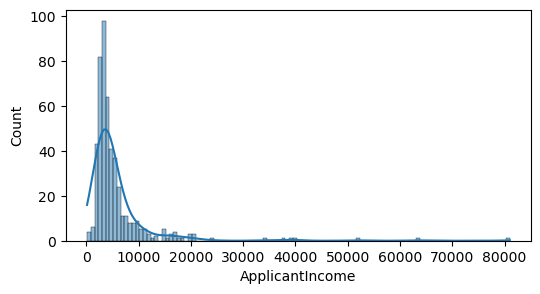

In [20]:
fig=plt.figure(figsize=(6,3))
sns.histplot(train_x['ApplicantIncome'],kde=True)

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

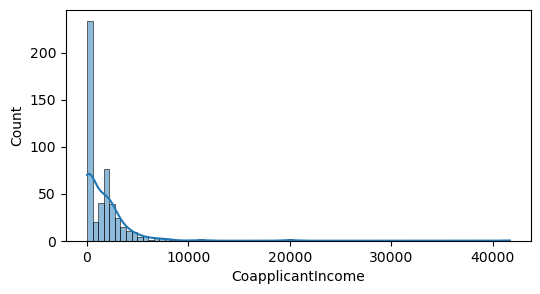

In [21]:
fig=plt.figure(figsize=(6,3))
sns.histplot(train_x['CoapplicantIncome'],kde=True)

<Axes: xlabel='LoanAmount', ylabel='Count'>

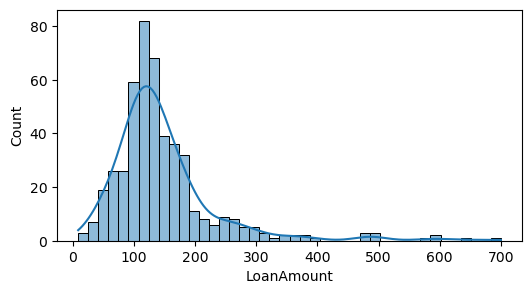

In [22]:
fig=plt.figure(figsize=(6,3))
sns.histplot(train_x['LoanAmount'],kde=True)

<Axes: >

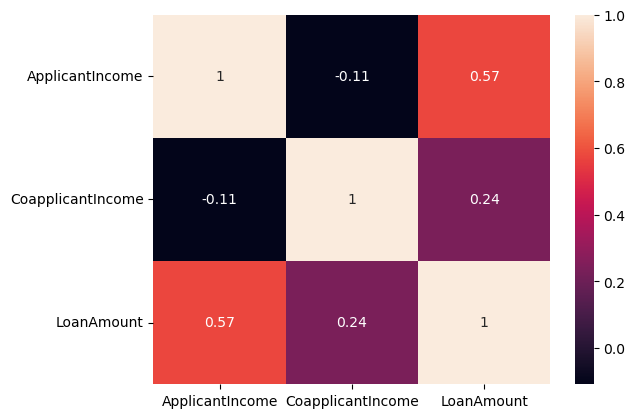

In [23]:
#identify relationship between con columns with each other 
sns.heatmap(train_x[train_x.columns[5:8]].corr(),annot=True)

we can see that there a strong relationship between loan amount and applicantincome 

data preparation and cleaning

In [24]:
# as we can see the con data is right skewed so we will apply a sqrt transformation

In [25]:
# perform sqrt transformation on columns
train_x[['LoanAmount','ApplicantIncome','CoapplicantIncome']]=np.sqrt(train_x[['LoanAmount','ApplicantIncome','CoapplicantIncome']])+1
test_x[['LoanAmount','ApplicantIncome','CoapplicantIncome']]=np.sqrt(test_x[['LoanAmount','ApplicantIncome','CoapplicantIncome']])+1

<Axes: xlabel='LoanAmount', ylabel='Count'>

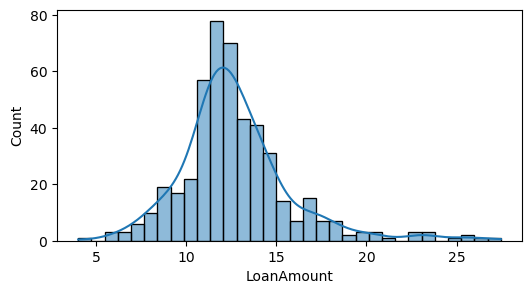

In [26]:
# constract a sample to see the diffrence 
fig=plt.figure(figsize=(6,3))
sns.histplot(train_x['LoanAmount'],kde=True)

impute missing values

In [27]:
train_x.isnull().sum()

Gender               12
Married               3
Dependents           15
Education             0
Self_Employed        28
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     11
Credit_History       41
Property_Area         0
dtype: int64

In [28]:
# encode non numeric values 
train_x['Married'].replace(['Yes','No'],[1,0], inplace=True)
test_x['Married'].replace(['Yes','No'],[1,0], inplace=True)

train_x['Gender'].replace(['Male','Female'],[1,0], inplace=True)
test_x['Gender'].replace(['Male','Female'],[1,0], inplace=True)

train_x['Dependents'].replace(['3+','2','1','0'],[3,2,1,0], inplace=True)
test_x['Dependents'].replace(['3+','2','1','0'],[3,2,1,0], inplace=True)

train_x['Education'].replace(['Graduate','Not Graduate'],[1,0], inplace=True)
test_x['Education'].replace(['Graduate','Not Graduate'],[1,0], inplace=True)

train_x['Self_Employed'].replace(['Yes','No'],[1,0], inplace=True)
test_x['Self_Employed'].replace(['Yes','No'],[1,0], inplace=True)

train_x['Property_Area'].replace(['Urban','Semiurban','Rural'],[2,1,0], inplace=True)
test_x['Property_Area'].replace(['Urban','Semiurban','Rural'],[2,1,0], inplace=True)

In [29]:
# impute misssing data using knn imputer
col=train_x.columns
imputer = KNNImputer()
train_x = imputer.fit_transform(train_x)
test_x = imputer.fit_transform(test_x)

In [30]:
#convert the numpy array into dataframe
train_x = pd.DataFrame(train_x,columns=col)
test_x = pd.DataFrame(test_x,columns=col)

In [31]:
train_x['Self_Employed'].value_counts()

0.0    412
1.0     69
0.2      6
0.4      3
0.6      1
Name: Self_Employed, dtype: int64

In [32]:
train_x['Married'].value_counts()

1.0    325
0.0    165
0.4      1
Name: Married, dtype: int64

In [33]:
train_x['Gender'].value_counts()

1.0    393
0.0     90
0.6      3
0.4      3
0.8      2
Name: Gender, dtype: int64

In [34]:
train_x['Dependents'].value_counts()

0.0    264
1.0     88
2.0     85
3.0     41
1.2      4
0.6      3
1.4      2
0.4      2
1.6      1
1.8      1
Name: Dependents, dtype: int64

In [35]:
train_x['Loan_Amount_Term'].value_counts()

360.0    414
180.0     34
480.0     12
300.0     11
240.0      4
84.0       3
60.0       2
324.0      2
36.0       2
120.0      2
372.0      2
312.0      1
288.0      1
348.0      1
Name: Loan_Amount_Term, dtype: int64

In [36]:
train_x['Credit_History'].value_counts()

1.0    390
0.0     73
0.8     17
0.6     10
0.4      1
Name: Credit_History, dtype: int64

In [37]:
# as we can see there are some values that should be handeled we will use a threshold of 0.5 in binary classes
# and x.5 in more than 2 classes

In [38]:
train_x['Self_Employed'] = train_x['Self_Employed'].apply(lambda x: 1 if x > 0.5 else 0)
test_x['Self_Employed'] = test_x['Self_Employed'].apply(lambda x: 1 if x > 0.5 else 0)

train_x['Married'] = train_x['Married'].apply(lambda x: 1 if x > 0.5 else 0)
test_x['Married'] = test_x['Married'].apply(lambda x: 1 if x > 0.5 else 0)

train_x['Gender'] = train_x['Gender'].apply(lambda x: 1 if x > 0.5 else 0)
test_x['Gender'] = test_x['Gender'].apply(lambda x: 1 if x > 0.5 else 0)

train_x['Dependents'] = train_x['Dependents'].apply(lambda x: 0 if x < 0.5 else (1 if x <= 1.5 else 2))
test_x['Dependents'] = test_x['Dependents'].apply(lambda x: 0 if x < 0.5 else (1 if x <= 1.5 else 2))

train_x['Credit_History'] = train_x['Credit_History'].apply(lambda x: 1 if x > 0.5 else 0)
test_x['Credit_History'] = test_x['Credit_History'].apply(lambda x: 1 if x > 0.5 else 0)

In [39]:
# decode non numeric data again
train_x['Married'].replace([1,0],['Yes','No'], inplace=True)
test_x['Married'].replace([1,0],['Yes','No'], inplace=True)

train_x['Gender'].replace([1,0],['Male','Female'], inplace=True)
test_x['Gender'].replace([1,0],['Male','Female'], inplace=True)

train_x['Dependents'].replace([3,2,1,0],['3+','2','1','0'], inplace=True)
test_x['Dependents'].replace([3,2,1,0],['3+','2','1','0'], inplace=True)

train_x['Education'].replace([1,0],['Graduate','Not Graduate'], inplace=True)
test_x['Education'].replace([1,0],['Graduate','Not Graduate'], inplace=True)

train_x['Self_Employed'].replace([1,0],['Yes','No'], inplace=True)
test_x['Self_Employed'].replace([1,0],['Yes','No'], inplace=True)

train_x['Property_Area'].replace([2,1,0],['Urban','Semiurban','Rural'], inplace=True)
test_x['Property_Area'].replace([2,1,0],['Urban','Semiurban','Rural'], inplace=True)

In [40]:
train_x.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

loan amount term column has many values which will lead for more complexity so we will reduce the values by adding new category called other 

In [41]:
train_x['Loan_Amount_Term'] = np.where((train_x['Loan_Amount_Term'] >= 0) & (train_x['Loan_Amount_Term'] <= 250),
    180,train_x['Loan_Amount_Term'])
test_x['Loan_Amount_Term'] = np.where((test_x['Loan_Amount_Term'] >= 0) & (test_x['Loan_Amount_Term'] <= 250),
    180,test_x['Loan_Amount_Term'])

train_x['Loan_Amount_Term'] = np.where((train_x['Loan_Amount_Term'] >= 251) & (train_x['Loan_Amount_Term'] <= 310),
    300,train_x['Loan_Amount_Term'])
test_x['Loan_Amount_Term'] = np.where((test_x['Loan_Amount_Term'] >= 251) & (test_x['Loan_Amount_Term'] <= 310),
    300,test_x['Loan_Amount_Term'])

train_x['Loan_Amount_Term'] = np.where((train_x['Loan_Amount_Term'] >= 311) & (train_x['Loan_Amount_Term'] <= 400),
    360,train_x['Loan_Amount_Term'])
test_x['Loan_Amount_Term'] = np.where((test_x['Loan_Amount_Term'] >= 311) & (test_x['Loan_Amount_Term'] <= 400),
    360,test_x['Loan_Amount_Term'])

train_x['Loan_Amount_Term']=np.where(train_x['Loan_Amount_Term'] > 400,480,train_x['Loan_Amount_Term'])
test_x['Loan_Amount_Term']=np.where(test_x['Loan_Amount_Term'] > 400,480,test_x['Loan_Amount_Term'])

In [42]:
train_x['Loan_Amount_Term'].value_counts()

360.0    420
180.0     47
480.0     12
300.0     12
Name: Loan_Amount_Term, dtype: int64

In [43]:
# apply one hot encoding on categorical data
train_x=pd.get_dummies(train_x,columns=['Gender','Married','Dependents','Loan_Amount_Term','Credit_History',
                                        'Education','Self_Employed','Property_Area'])
test_x=pd.get_dummies(test_x,columns=['Gender','Married','Dependents','Loan_Amount_Term','Credit_History',
                                        'Education','Self_Employed','Property_Area'])

applying lable encoding on the target 

In [44]:
train_y.replace(['Y','N'],[1,0],inplace=True)
test_y.replace(['Y','N'],[1,0],inplace=True)

In [45]:
train_y.value_counts()

Loan_Status
1              332
0              159
dtype: int64

model selection

In [46]:
log_clf=LogisticRegression()
gb_clf = GradientBoostingClassifier()
rf = RandomForestClassifier()

logistic regression

In [47]:
 log_clf.fit(train_x,train_y)
y_train_pred = log_clf.predict(train_x)
train_precision_score = precision_score(train_y, y_train_pred)

y_test_pred = log_clf.predict(test_x)
test_precision_score = precision_score(test_y, y_test_pred)

print(f'precision score on train data : {train_precision_score * 100}')
print(f'precision score on test data : {test_precision_score * 100}')

precision score on train data : 78.17745803357315
precision score on test data : 83.01886792452831


C:\Users\maher\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\maher\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


random forrest

In [48]:
 rf.fit(train_x,train_y)
y_train_pred = rf.predict(train_x)
train_precision_score = precision_score(train_y, y_train_pred)

y_test_pred = rf.predict(test_x)
test_precision_score = precision_score(test_y, y_test_pred)

print(f'precision score on train data : {train_precision_score * 100}')
print(f'precision score on test data : {test_precision_score * 100}')

precision score on train data : 100.0
precision score on test data : 81.63265306122449


C:\Users\maher\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


gradient boosting

In [49]:
gb_clf.fit(train_x,train_y)
y_train_pred = gb_clf.predict(train_x)
train_precision_score = precision_score(train_y, y_train_pred)

y_test_pred = gb_clf.predict(test_x)
test_precision_score = precision_score(test_y, y_test_pred)

print(f'precision score on train data : {train_precision_score * 100}')
print(f'precision score on test data : {test_precision_score * 100}')

precision score on train data : 86.42297650130548
precision score on test data : 84.84848484848484


C:\Users\maher\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
#seems gradient boosting is most suitable , so let's see his confusion matrix 

In [51]:
cm = confusion_matrix(test_y, y_test_pred)
print(cm)

[[18 15]
 [ 6 84]]


In [52]:
print(classification_report(test_y, y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.55      0.63        33
           1       0.85      0.93      0.89        90

    accuracy                           0.83       123
   macro avg       0.80      0.74      0.76       123
weighted avg       0.82      0.83      0.82       123

